## Milestone 2

In [7]:
from sklearn.preprocessing import StandardScaler, normalize

In [ ]:
df.isna().values.any()

False

In [ ]:
new_df = df.to_numpy()
new_df
demo_var = StandardScaler().fit(new_df)
demo_var.scale_

new_df.std()

40.951701378014036

In [ ]:
# from sklearn.preprocessing import normalize
# import numpy as np

# Create sample data
# X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Normalize the data using L2 normalization
X_normalized = normalize(new_df, norm='l2')


In [ ]:
X_normalized

array([[-7.41091322e-01,  5.25935777e-01,  2.69541333e-02, ...,
         8.04376305e-03,  1.19530858e-03,  3.34686403e-02],
       [ 9.69525054e-01, -2.09627039e-01,  7.14526923e-03, ...,
        -3.63255977e-03,  8.38508155e-05,  2.62033798e-03],
       [ 9.89854642e-01, -9.89854642e-02,  4.62631044e-03, ...,
        -5.33526256e-03,  1.04808139e-04,  2.91133718e-03],
       ...,
       [ 9.95693740e-01, -8.32056050e-03,  2.36343798e-03, ...,
        -1.41678517e-03,  6.65644840e-05,  2.21881613e-03],
       [ 9.98877541e-01,  2.51606433e-03,  2.29950966e-03, ...,
        -1.74400290e-03,  4.52891580e-05,  2.26445790e-03],
       [ 9.98867496e-01, -1.09967064e-02,  2.60084486e-03, ...,
        -6.53708272e-04,  4.21540411e-05,  2.74917659e-03]])

#### Normalize 

In [8]:
data = "../data/train.csv"
df = pd.read_csv(data)
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1:].to_numpy()
# standardize X
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# random forest regressor
kf = KFold(n_splits=10)
model = RandomForestRegressor(n_estimators=10)
training_set = [(X,y),(X_std,y)]
in_sample_error = []
out_sample_error = []
for set_X, set_y in training_set:
    in_sample_err = []
    out_sample_err = []
    for train, test in kf.split(X):
        model.fit(set_X[train], np.ravel(set_y[train]))
        model.fit(set_X[train], np.ravel(set_y[train]))
        predict_train = model.predict(set_X[train])
        predict_test = model.predict(set_X[test])
        in_sample_err.append(MSE(predict_train, set_y[train]))
        out_sample_err.append(MSE(predict_test, set_y[test]))
    in_sample_error.append(in_sample_err)
    out_sample_error.append(out_sample_err)

    print('in sample error:',np.mean(in_sample_err))
    print('out sample error:',np.mean(out_sample_err))
print(out_sample_error[0])
print(out_sample_error[1])
print('in sample t-Test')
print(stats.ttest_rel(in_sample_error[0], in_sample_error[1]))

print('out sample t-Test')
print(stats.ttest_rel(out_sample_error[0], out_sample_error[1]))

in sample error: 0.005300060606060606
out sample error: 0.029683672727272726
in sample error: 0.005304063299663301
out sample error: 0.029392521212121214
[0.02918048484848485, 0.02884484848484848, 0.03139187878787879, 0.030262545454545455, 0.027228242424242426, 0.02850339393939394, 0.030491030303030305, 0.031527878787878785, 0.02883721212121212, 0.030569212121212122]
[0.028286424242424245, 0.028020000000000003, 0.029015030303030306, 0.028037575757575758, 0.02804169696969697, 0.027090181818181822, 0.03254569696969697, 0.03304278787878788, 0.02885260606060606, 0.030993212121212123]
in sample t-Test
TtestResult(statistic=-0.07971425097307931, pvalue=0.9382088806133239, df=9)
out sample t-Test
TtestResult(statistic=0.6087505128419045, pvalue=0.5577400530280223, df=9)


In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [29]:
# Perform k-means clustering with k=2
# which dataset variable to use? im not entirely clear
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit_transform(X,y)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

/Users/clint/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/clint/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


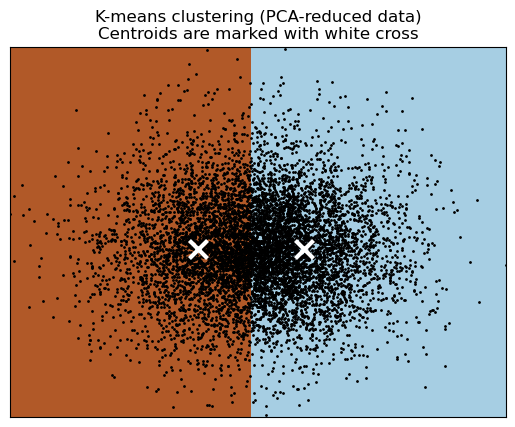

In [32]:

reduced_data = PCA(n_components=2).fit_transform(df)
# kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [33]:
# PCA(n_components=2).fit(X_normalized)


n_components_list = [10,20,30,40]


In [34]:
def PCA_plotting(n_components, df):
    reduced_data = PCA(n_components=n_components).fit_transform(df)
    # kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
    kmeans = KMeans(n_clusters=k)
    # kmeans.fit_transform(X,y)


    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # print(1)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        "K-means clustering (PCA-reduced data)\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    return

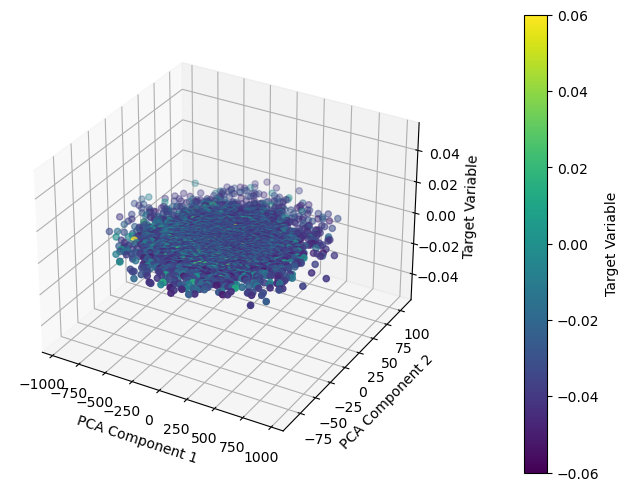

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.cm import ScalarMappable

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a color gradient for the target variable
colors = y.astype(float)
colors -= colors.min()
colors /= colors.max()

# Plot 3D scatter plot with PCA components and color gradient for target variable
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:,0], X_pca[:,1], np.zeros_like(X_pca[:,0]), c=colors, cmap='viridis')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Target Variable')

# Add colorbar to plot
sm = ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=-.06, vmax=0.06))
sm.set_array(y)
cbar = plt.colorbar(sm, ax=ax, pad=0.2)
cbar.set_label('Target Variable')

plt.show()


In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n_components_list = [10,20,30,40]
# Perform PCA with 2 components
for n in n_components_list:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    print('----------------------',n,' Components----------------------')
    print(X_pca)

# Plot 3D scatter plot with PCA components and target variable
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_pca[:,0], X_pca[:,1], y)
# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('Target Variable')
# plt.show()



---------------------- 10  Components----------------------
[[ 1.94824839e+01  3.25051621e+01 -1.39508845e+01 ...  1.31925215e+00
   9.44441025e-02  2.52298939e-02]
 [-1.96601662e+02 -2.99416414e+01 -1.04082500e+01 ... -7.90024973e-02
  -2.28625061e-02  8.11248561e-03]
 [-1.81559248e+02 -5.94195053e+00 -8.29915898e+00 ... -2.35391236e-01
   1.14768099e-01 -9.19919406e-02]
 ...
 [-3.70424928e+02  1.58053783e+01  2.65423525e+01 ... -2.01924942e-01
   6.07184895e-02 -2.81194462e-02]
 [-4.08531275e+02  1.27530039e+01 -7.46151777e+00 ... -1.57646597e-01
   3.90759558e-02 -3.11126029e-03]
 [-5.56477160e+02  1.01967177e+01  1.40331834e+01 ... -6.70465930e-02
  -4.60929764e-02  4.78717998e-02]]
---------------------- 20  Components----------------------
[[ 1.94824839e+01  3.25051621e+01 -1.39508845e+01 ...  1.32047179e-03
  -3.05280819e-04  1.84237326e-04]
 [-1.96601662e+02 -2.99416414e+01 -1.04082500e+01 ... -1.77315213e-05
  -7.26967693e-05  6.57005440e-05]
 [-1.81559248e+02 -5.94195053e+00 

In [37]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset and split into X (features) and y (target variable)
data = pd.read_csv("../data/train.csv")
X = data.drop("target", axis=1)
y = data["target"]

# Define number of PCA components to try
n_components_list = [10, 20, 30, 40]

# Define model to use in k-fold cross-validation
model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression())
])

# Perform PCA and k-fold cross-validation for each number of components
for n_components in n_components_list:
    # Define PCA transformer
    pca = PCA(n_components=n_components)
    
    # Apply PCA to X
    X_pca = pca.fit_transform(X)
    
    # Define k-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform k-fold cross-validation with the model
    scores = cross_val_score(model, X_pca, y, cv=kf)
    
    # Print results
    print(f"PCA with {n_components} components: {scores.mean():.3f} (+/- {scores.std():.3f})")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/clint/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/clint/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/clint/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1204, in fit
    check_classification_targets(y)
  File "/Users/clint/anaconda3/lib/python3.10/site-packages/sklearn/utils/multiclass.py", line 207, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


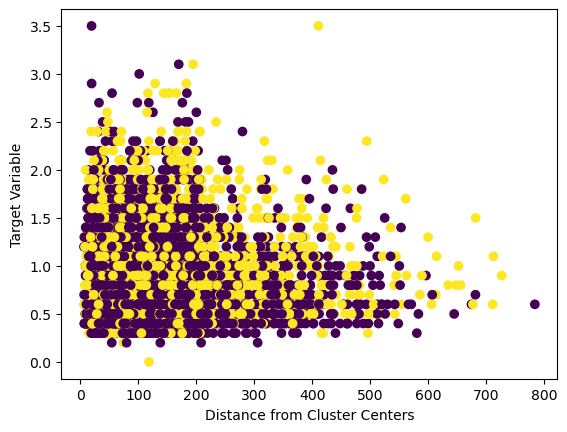

R^2 score: 9.548505500611704e-06


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Load dataset and split into X (features) and y (target variable)
data = pd.read_csv("../data/train.csv")
X = data.drop("target", axis=1)
y = data["target"]

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Calculate distances from cluster centers
distances = np.sqrt(((X - centers[labels])**2).sum(axis=1))

# Plot scatter plot with distances and target variable
plt.scatter(distances, y, c=labels, cmap="viridis")
plt.xlabel("Distance from Cluster Centers")
plt.ylabel("Target Variable")
plt.show()

# Fit linear regression model with distances as features
reg = LinearRegression()
reg.fit(distances.values.reshape(-1, 1), y)
print("R^2 score:", reg.score(distances.values.reshape(-1, 1), y))

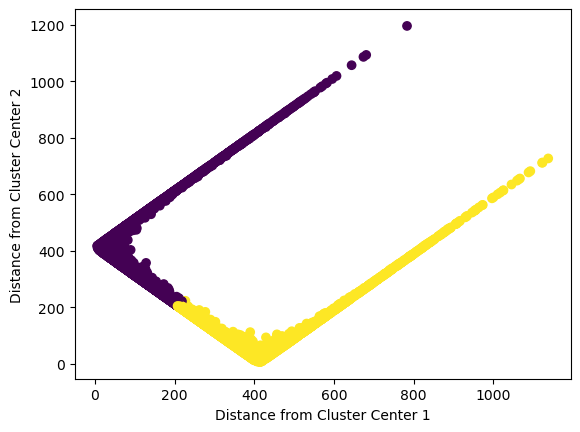

R^2 score: 0.005310203117389611


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Load dataset and split into X (features) and y (target variable)
data = pd.read_csv("../data/train.csv")
X = data.drop("target", axis=1)
y = data["target"]

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Calculate distances from cluster centers
distances = kmeans.transform(X)

# Plot scatter plot with distances and target variable
plt.scatter(distances[:, 0], distances[:, 1], c=labels, cmap="viridis")
plt.xlabel("Distance from Cluster Center 1")
plt.ylabel("Distance from Cluster Center 2")
# plt.colorbar()
plt.show()


# Fit linear regression model with distances as features
reg = LinearRegression()
reg.fit(distances, y)
print("R^2 score:", reg.score(distances, y))


In [30]:
import warnings
warnings.filterwarnings("ignore")

# Perform k-means clustering with k=2, 5, and 10
for k in [2, 5, 10]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Calculate distances from cluster centers
    distances = np.sqrt(((X - centers[labels])**2).sum(axis=1))

    # Fit linear regression model with distances as features
    reg = LinearRegression()
    reg.fit(distances.values.reshape(-1, 1), y)
    print(f"k={k}, R^2 score:", reg.score(distances.values.reshape(-1, 1), y))


k=2, R^2 score: 9.548505500611704e-06
k=5, R^2 score: 6.498387170450481e-05
k=10, R^2 score: 3.995313470617212e-06


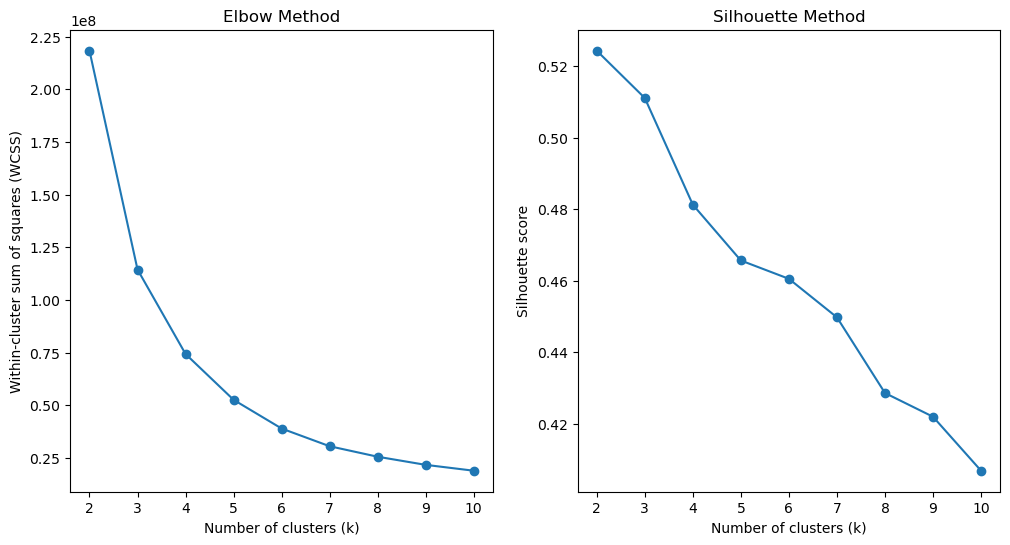

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset and split into X (features) and y (target variable)
data = pd.read_csv("../data/train.csv")
X = data.drop("target", axis=1)
y = data["target"]

# Calculate within-cluster sum of squares (WCSS) and silhouette score for different values of k
wcss = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot WCSS and silhouette score as a function of k
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(range(2, 11), wcss, marker='o')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Within-cluster sum of squares (WCSS)')
axs[0].set_title('Elbow Method')

axs[1].plot(range(2, 11), silhouette_scores, marker='o')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Silhouette score')
axs[1].set_title('Silhouette Method')

plt.show()

In [53]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Load dataset and split into X (features) and y (target variable)
data = pd.read_csv("../data/train.csv")
X = data.drop("target", axis=1)
y = data["target"]

# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define number of components for PCA and number of folds for cross-validation
n_components = [10, 20, 30, 40]
n_folds = 10

# Perform k-fold cross-validation with linear regression model for each number of PCA components
for n in n_components:
    # Perform PCA and transform data
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_std)

    # Perform k-fold cross-validation with linear regression model
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in kf.split(X_pca):
        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y[train_index], y[test_index]

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        scores.append(score)

    # Print average R^2 score for k-fold cross-validation
    print(f"PCA with {n} components - Average R^2 score: {np.mean(scores):.4f}")

# Perform k-fold cross-validation with linear regression model on original standardized dataset
scores = []
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_std):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg = LinearRegression()
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    scores.append(score)

# Print average R^2 score for k-fold cross-validation on original dataset
print(f"Original standardized dataset - Average R^2 score: {np.mean(scores):.4f}")


PCA with 10 components - Average R^2 score: -1.1513
PCA with 20 components - Average R^2 score: -18.7283
PCA with 30 components - Average R^2 score: -5694493951.6642
PCA with 40 components - Average R^2 score: -3552288062163501275152384.0000
Original standardized dataset - Average R^2 score: -11978076907850751832752128.0000


/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


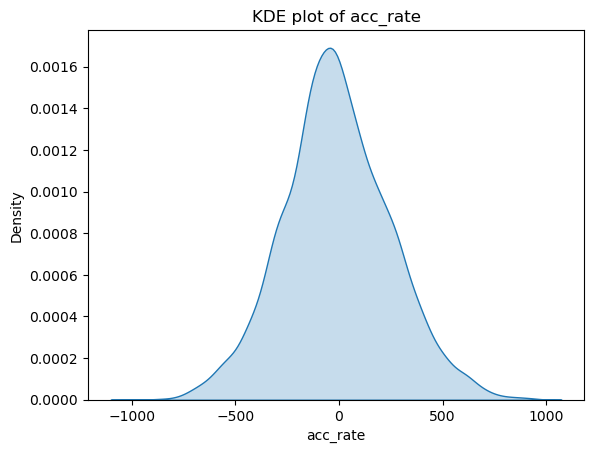

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


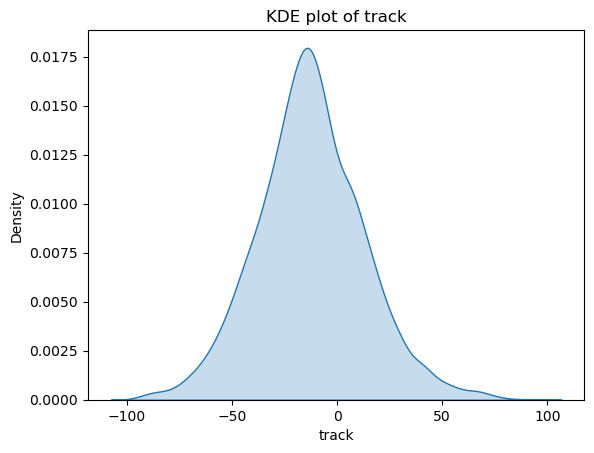

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


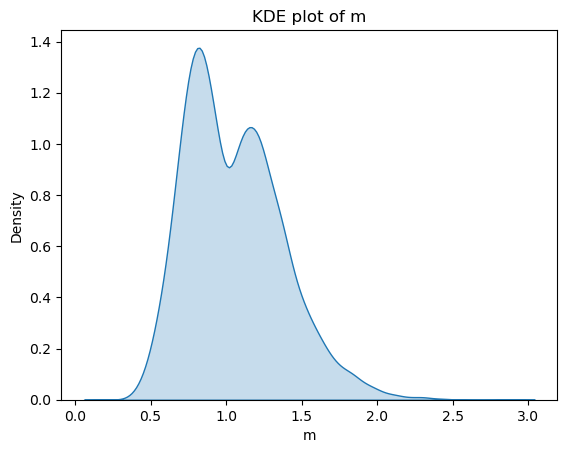

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


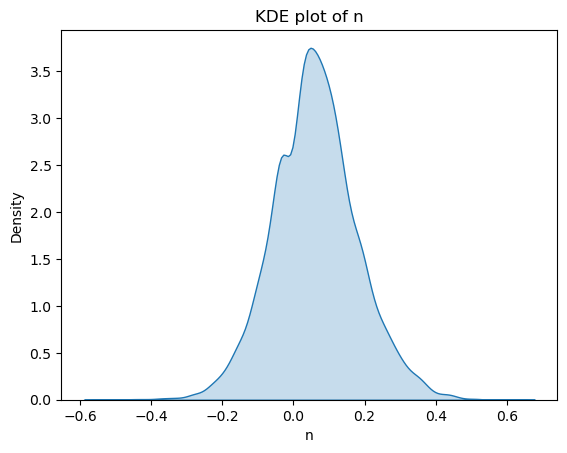

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


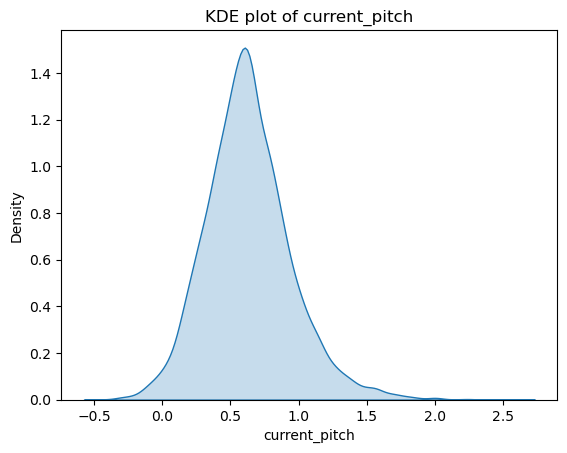

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


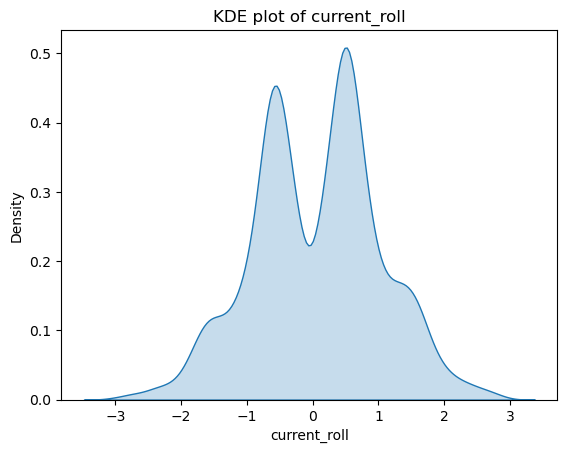

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


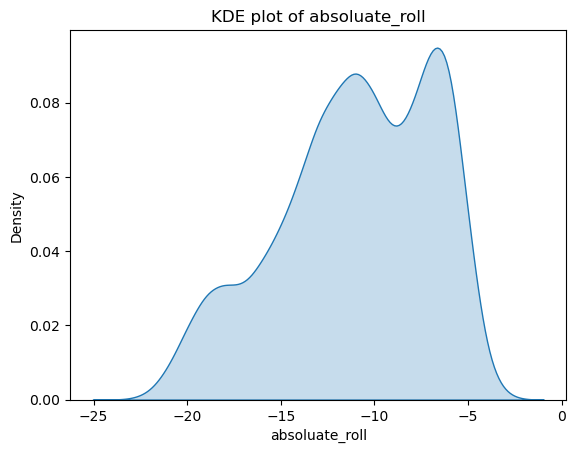

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


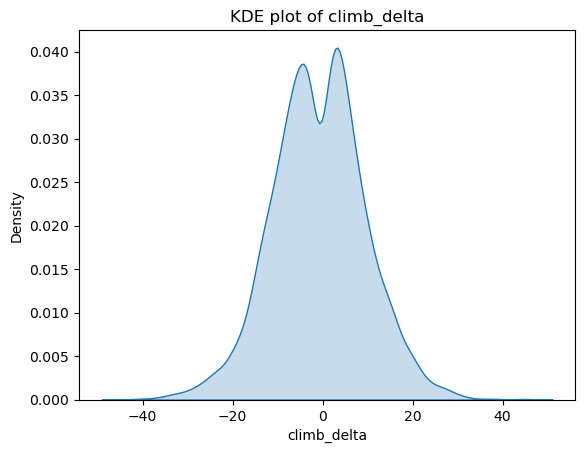

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


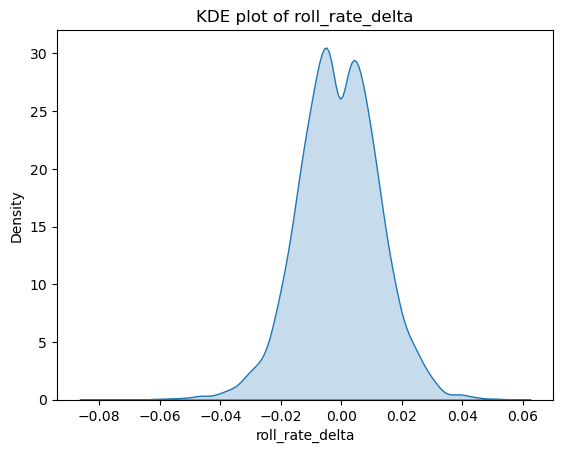

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


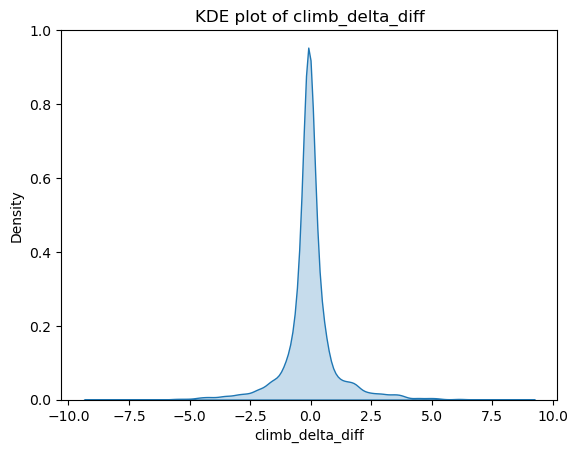

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


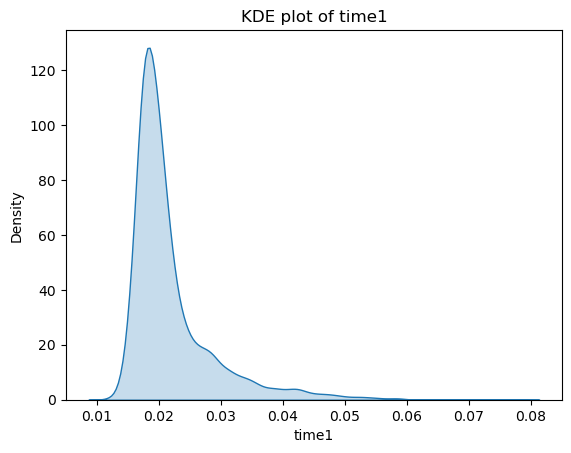

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


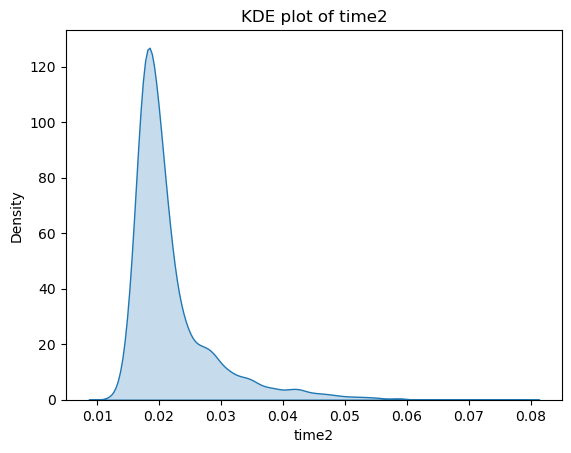

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


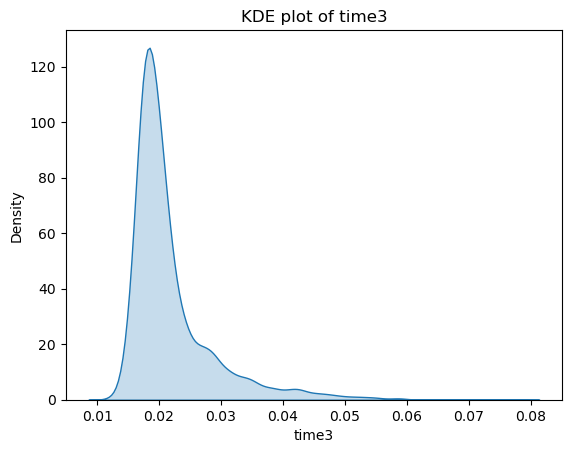

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


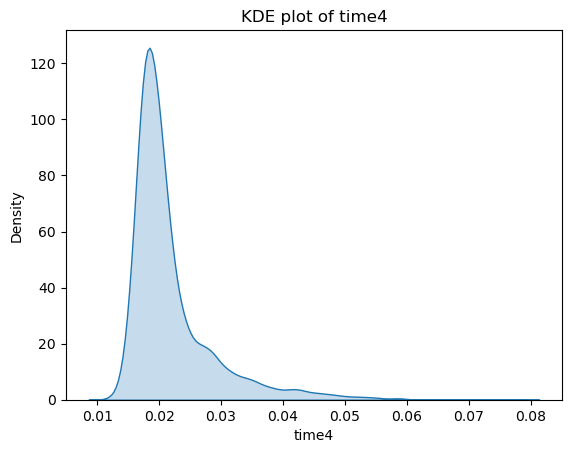

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


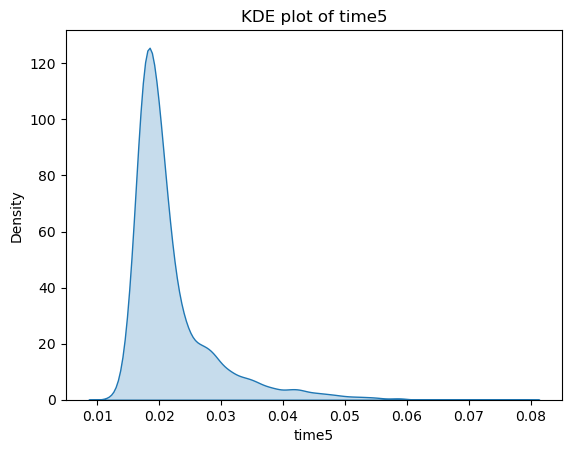

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


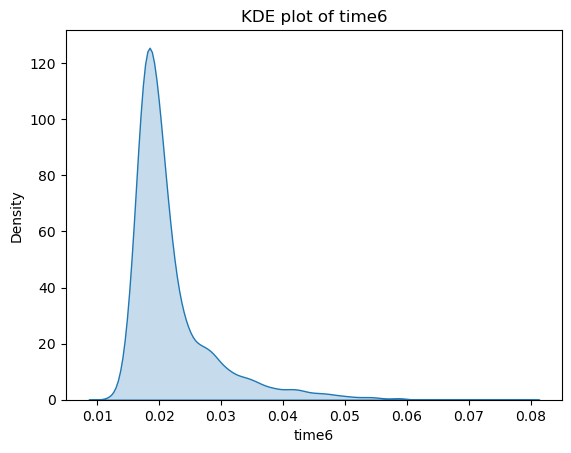

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


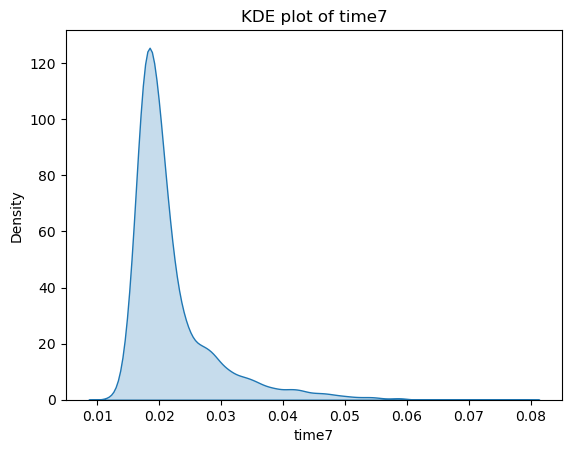

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


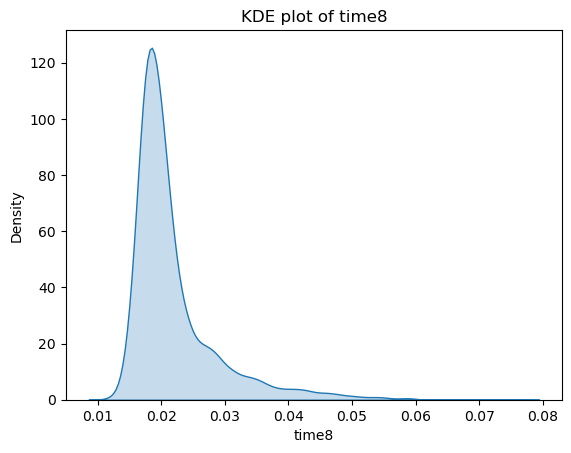

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


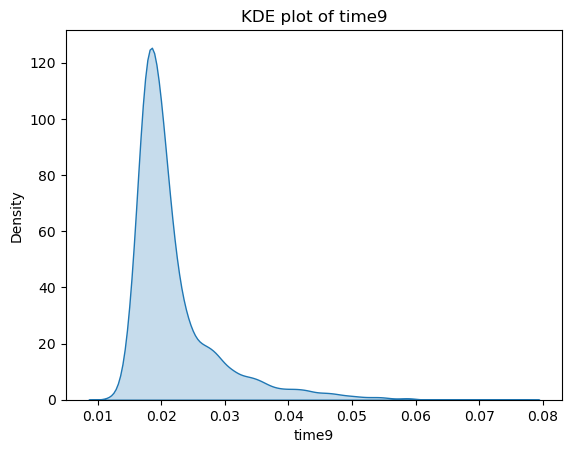

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


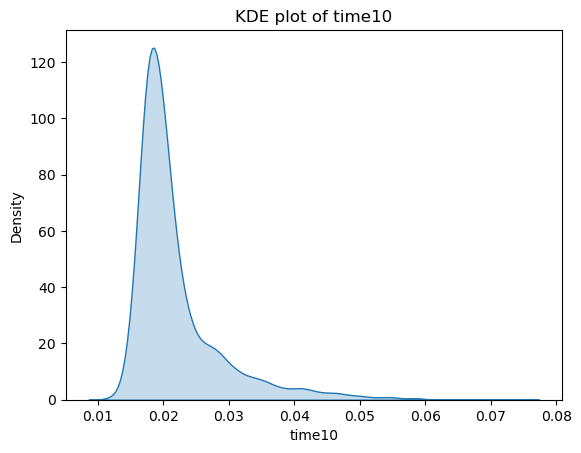

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


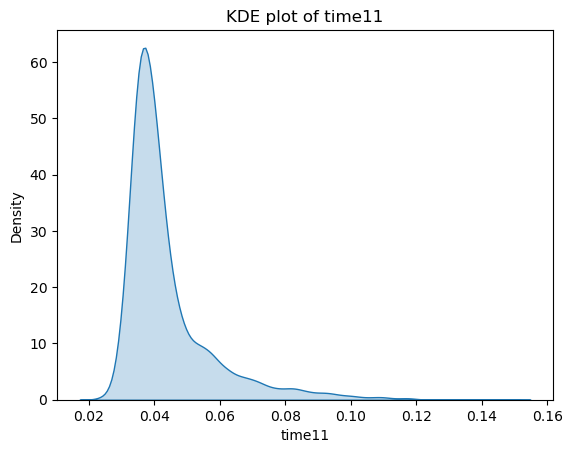

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


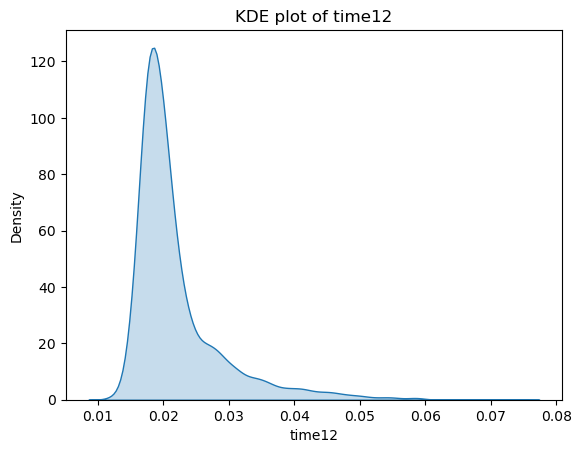

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


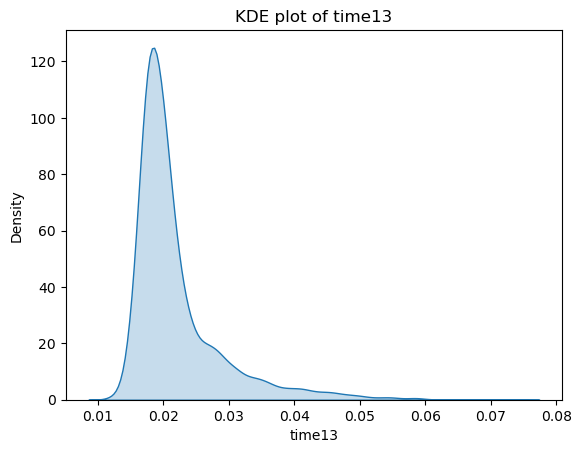

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


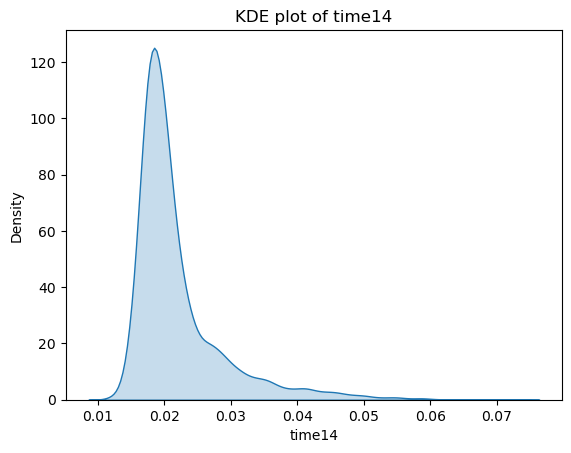

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


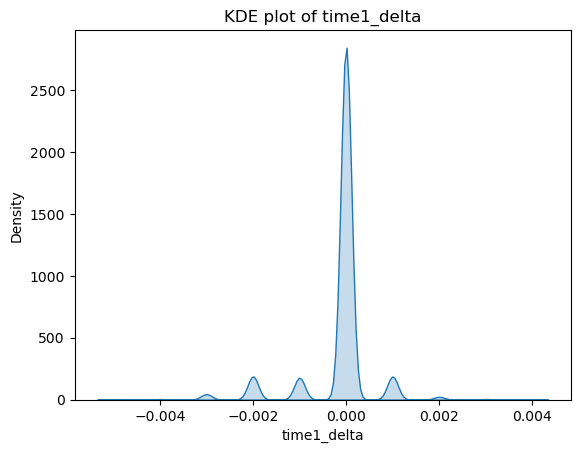

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


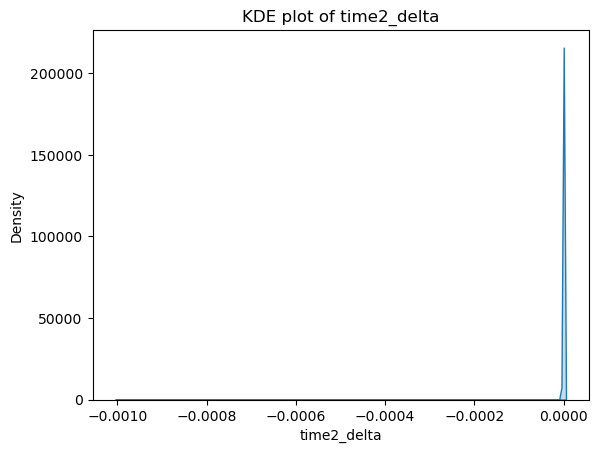

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


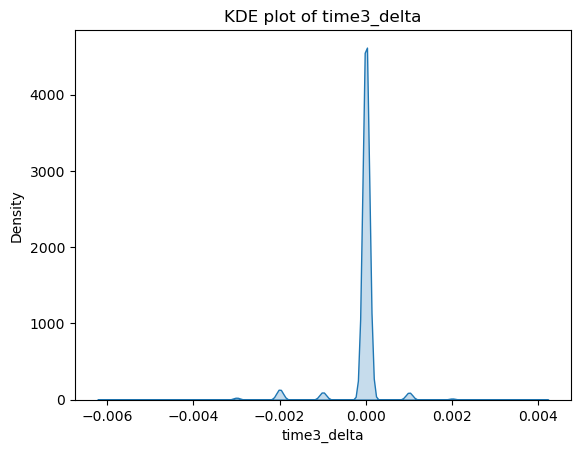

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


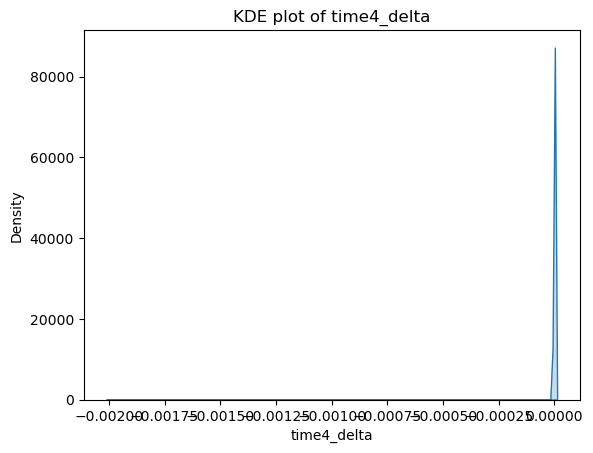

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


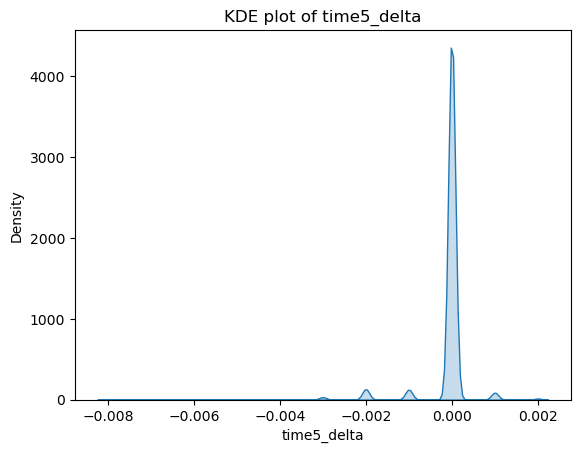

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


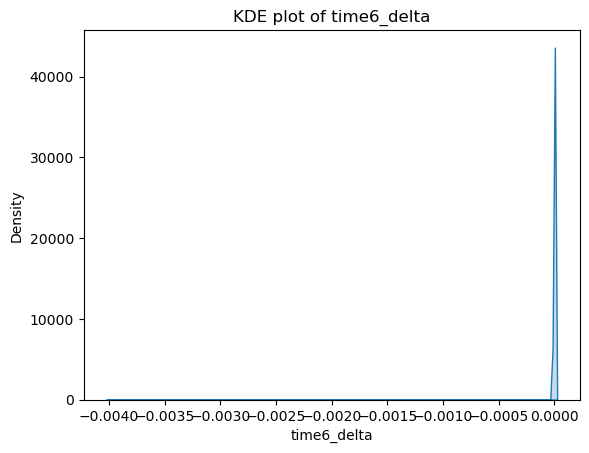

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


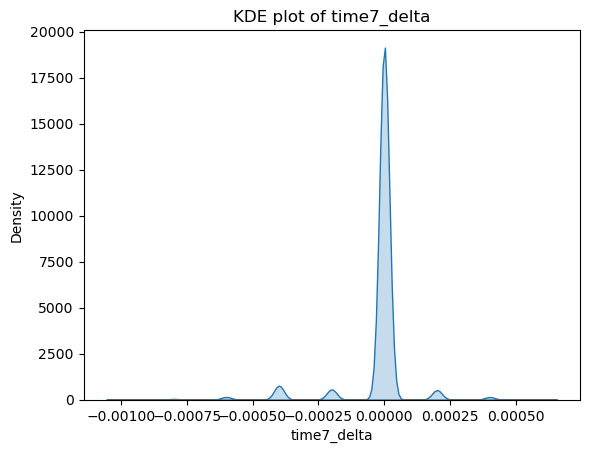

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


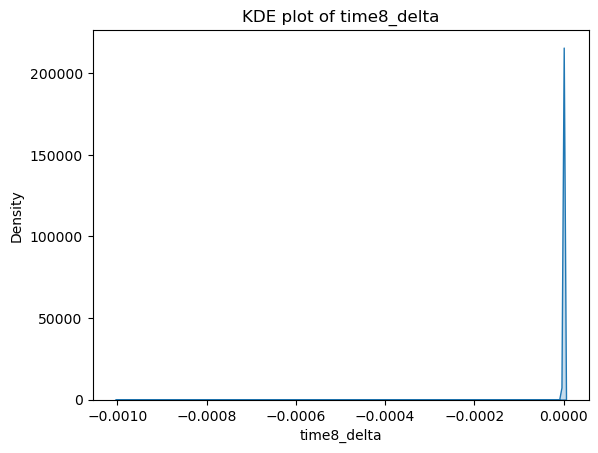

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


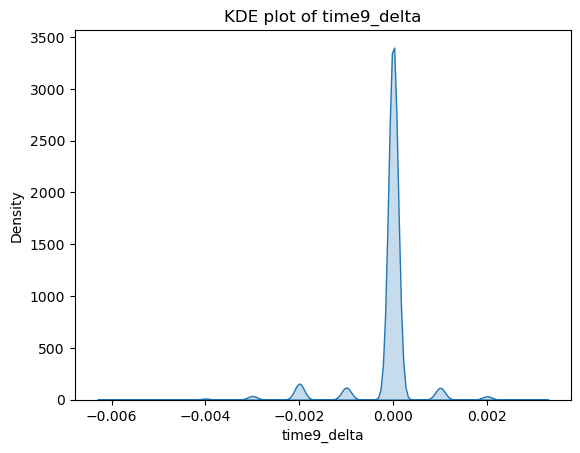

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


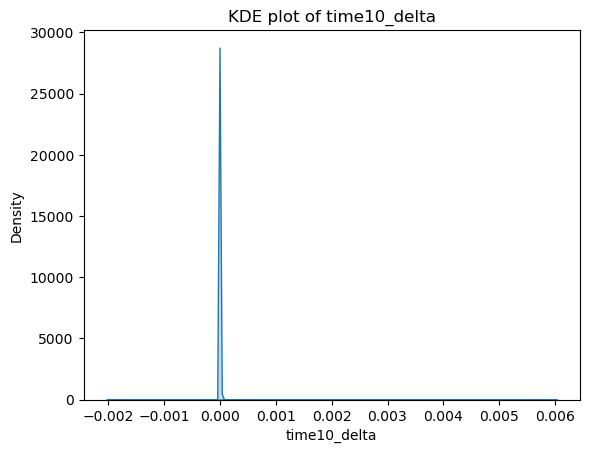

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


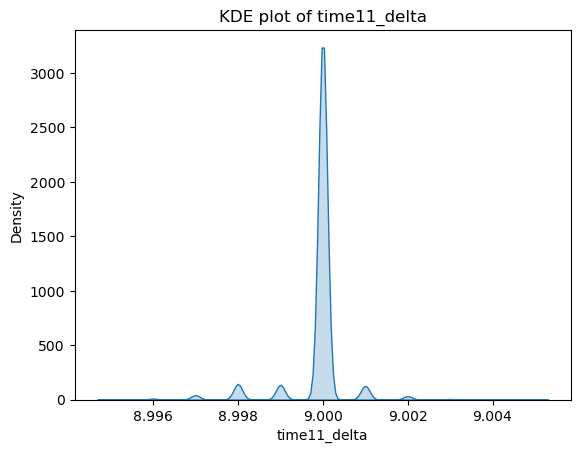

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


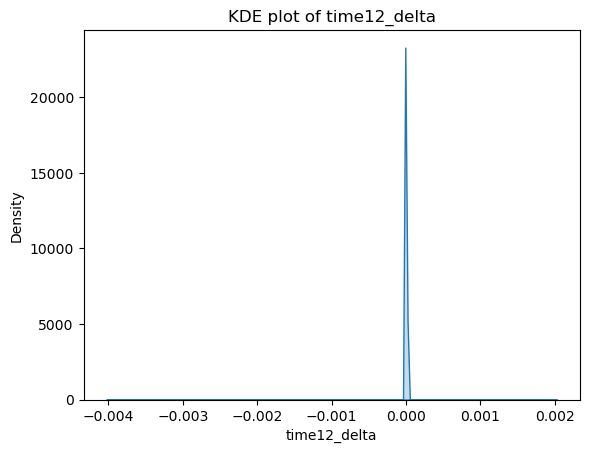

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


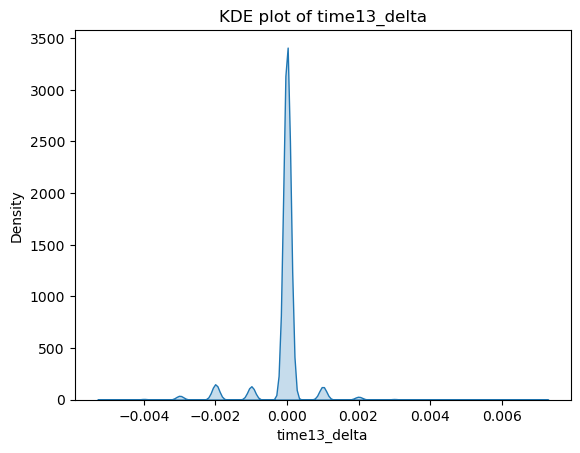

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


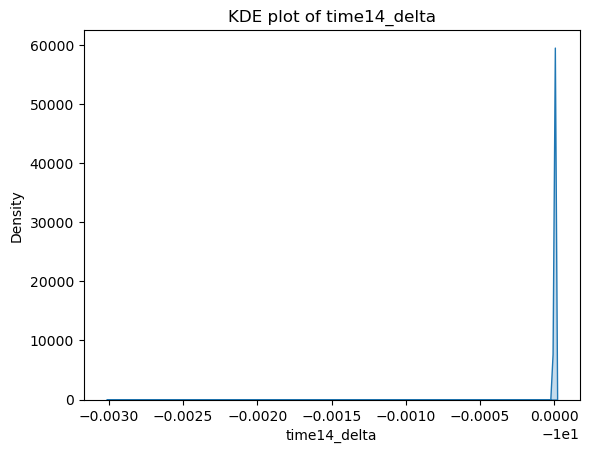

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


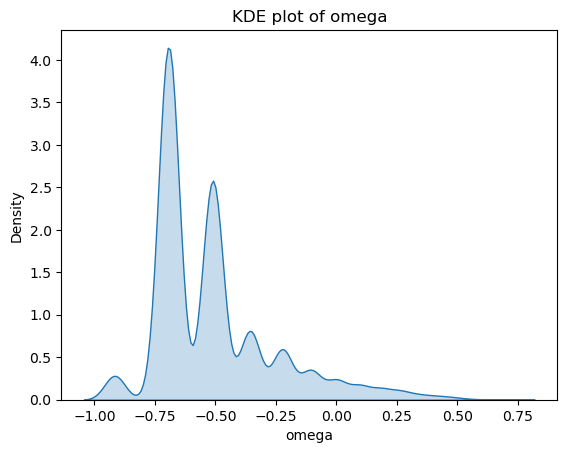

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


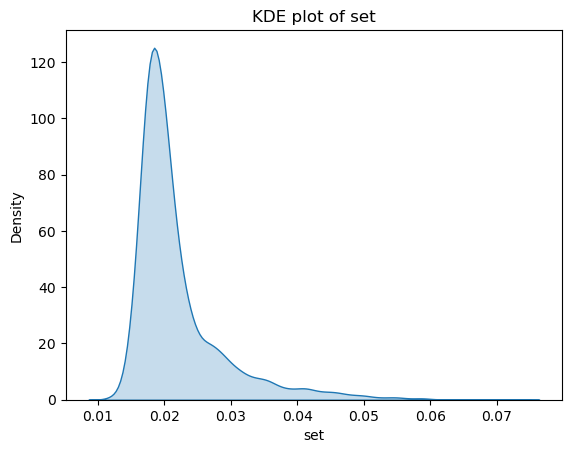

/var/folders/2w/j_3cm0m15n325k9n4gkmqrd80000gn/T/ipykernel_59924/1233712175.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)


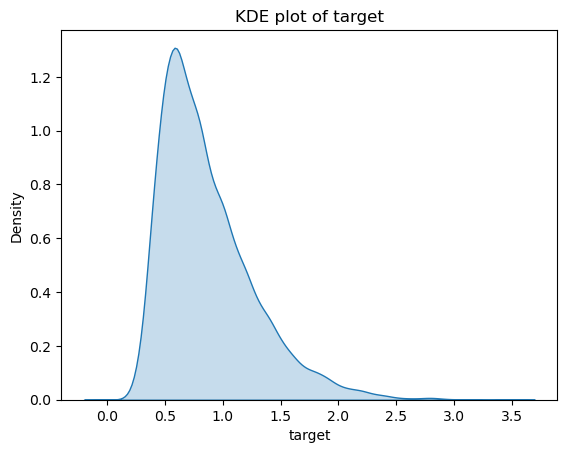

In [27]:
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv("../data/train.csv")

# Loop through each feature and plot its KDE
for feature in data.columns:
    sns.kdeplot(data[feature], shade=True)
    plt.title(f"KDE plot of {feature}")
    plt.xlabel(feature)
    plt.show()

In [28]:
import pandas as pd

# Load dataset from Milestone 1
data = pd.read_csv("../data/train.csv")

# Calculate correlation matrix
corr_matrix = data.corr()

# Print correlation matrix
print(corr_matrix)

# Find highly correlated pairs of features
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i,j]) >= 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Print highly correlated pairs of features
print("Highly correlated pairs:")
for pair in high_corr_pairs:
    print(pair)

                  acc_rate     track         m         n  current_pitch  \
acc_rate          1.000000 -0.008467  0.155929  0.099889      -0.789164   
track            -0.008467  1.000000  0.056252  0.347037       0.004609   
m                 0.155929  0.056252  1.000000  0.137915      -0.112548   
n                 0.099889  0.347037  0.137915  1.000000       0.146059   
current_pitch    -0.789164  0.004609 -0.112548  0.146059       1.000000   
current_roll     -0.133945  0.012356 -0.034172  0.039020       0.090862   
absoluate_roll   -0.043429  0.075668 -0.052549 -0.395333      -0.165691   
climb_delta       0.077362 -0.458368 -0.095433 -0.766239      -0.190116   
roll_rate_delta   0.154626 -0.069289  0.127867 -0.203489      -0.140952   
climb_delta_diff -0.341051 -0.007849 -0.127871 -0.443127       0.237025   
time1             0.088944  0.004875  0.038749  0.360342       0.526786   
time2             0.074130  0.011048  0.041675  0.375389       0.540229   
time3             0.07413